## Introduction

It dawned on me that this is why I thought of the aptly named notebooks when I want to explore new things. In short, I'm lookng at other's code and seeing what I can garner.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/train.csv')
print(df.shape)
df.head()

(76518, 38)


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')

df.columns #Phew, found the original website.

Index(['id', 'marital_status', 'application_mode', 'application_order',
       'course', 'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nacionality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation', 'admission_grade',
       'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units

### The First New Thing(s) & The Admittance of Mistakes

Also, copying relevant code to run whatever:

In [8]:
print(df.select_dtypes(include=int).columns.to_list()[:5])
categorical_features = df.select_dtypes(include=int).columns.to_list()
continuous_features = df.select_dtypes(include=float).columns.to_list()

['id', 'marital_status', 'application_mode', 'application_order', 'course']


A very neat bit of code I just noticed. Yes! This is what I was looking for to better sift through features, especially when often I've noticed with my eda the relevant analysis and code to look at, say int. vs. float are quite different.

In [17]:
#This bit is so tangential, but I just realized:

unique_categories = df['target'].unique()
# print(unique_categories)
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}
df['target_encoded'] = df['target'].map(category_to_int)

print(df['educational_special_needs'].corr(df['target_encoded']))
print(df['curricular_units_1st_sem_(credited)'].corr(df['target_encoded']))
print(df['curricular_units_1st_sem_(without_evaluations)'].corr(df['target_encoded']))
print(df['curricular_units_2nd_sem_(credited)'].corr(df['target_encoded']))
print(df['curricular_units_2nd_sem_(without_evaluations)'].corr(df['target_encoded']))

0.0016064794739226625
-0.03339695005861841
0.05336534850191106
-0.03649945747047842
0.06881799497047925


Yeah, I really should have been a bit more rigorous with my checking eearlier before I delete matters. Ie I negelected to check if all the special education people graduated. So, albeit a trait that rarely occurs but if it does... Pragmatically, we ended up fine in that case and likely the others, but still...

In [11]:
#Another nifty bit of code:
discrete_features = [col for col in categorical_features if col.startswith("curricular")] + ["age_at_enrollment"]
print(len(discrete_features))
#I find so much elegance in this bit of code, directly adding one feature to whatever withstands the prior list compression

#Reminder that these are simply the names of the featues.

#It's much more graceful than:

discrete_features = [col for col in categorical_features if col.startswith("curricular")]
discrete_features.append("age_at_enrollment")
print(len(discrete_features))

#Ie the adding of lists together appends them.

11


Sigh, our host made a mistake so much of the actuarial PA exam attempted to prevent - nice graphs or print outs but explain what all these numbers mean without a flood...

Ie actually comment on the nature of some of them... What should we care about? Eveything?!!?

So too with his visuals on counts, distribution, 

Oh, and I took for granted the following:

With various features that are, bottom-line, represented by integers, such as course number, care likely should be taken to dummify those as they are not ordinal. Might as well experiment with that 

In [4]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(f"{i} is actually an object.")

target is actually an object.


Hmm, so everything else looks like it'll be some numeric value (inc. booleans). That will make things easier. Reminder to when we're cleaning up the data to convert target to a numeric representation.

In [5]:
exceptions = ['id']

for i in df.columns:
    if len(df[i].unique()) == df.shape[0] and i not in exceptions:
        df = df.drop([i], axis=1) #Not adding anything to our model... Hmm, now that I think about it, let's make this better:
        print(f"Just dropped {i} as it wasn't adding any value whatsoever to our model.")
    else:
        print(f"Well, {i} has {len(df[i].unique())} unique fields, so we'll keep it...for now!")

Well, id has 76518 unique fields, so we'll keep it...for now!
Well, marital_status has 6 unique fields, so we'll keep it...for now!
Well, application_mode has 22 unique fields, so we'll keep it...for now!
Well, application_order has 8 unique fields, so we'll keep it...for now!
Well, course has 19 unique fields, so we'll keep it...for now!
Well, daytime/evening_attendance has 2 unique fields, so we'll keep it...for now!
Well, previous_qualification has 21 unique fields, so we'll keep it...for now!
Well, previous_qualification_(grade) has 110 unique fields, so we'll keep it...for now!
Well, nacionality has 18 unique fields, so we'll keep it...for now!
Well, mother's_qualification has 35 unique fields, so we'll keep it...for now!
Well, father's_qualification has 39 unique fields, so we'll keep it...for now!
Well, mother's_occupation has 40 unique fields, so we'll keep it...for now!
Well, father's_occupation has 56 unique fields, so we'll keep it...for now!
Well, admission_grade has 668 un

Decent amount of unique fields for each one. Recall that we have 76k data points to work it, so expecting/hoping to see overwhelmingmajority of them to have recent representation.

In [6]:
if sum(df.isnull().sum())==0:
    print("Phew, no nulls.")
else:
    print(df.columns[df.isnull().any()]) #Should be done with general stuff. Onto individualized eda. Starting with our targe.

Phew, no nulls.


In [7]:
df['target'].value_counts() #Hmm, quite a lot of enrolled. Guess the 'data' was meant to just see if we can distinguish the
#various possibilities. Iemor likely to be single...

#Of note also is the vast amount of dropouts.... perhaps snythetic but still... what kind of school is this?!!?

target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [8]:
i = 1

In [9]:
# df.iloc[:, i:i+5].apply(pd.Series.value_counts) #Eh, when all over like with course won' work out...
#Off hand I suppose I'll neeed to look at these somwhat individually; well, perhaps I can go through and parse them to see
#what's categorical and look at those in a similar manner. So too with whatever other similar types...

#Unfortunately I don't see a quick way to group them. So, I'll leave that idea on the backbuner for now and manaully
#go through them.

In [10]:
print(df[df.columns[i]].value_counts(normalize=True))
# df.groupby(df.columns[i])['target'].describe()
df.groupby(df.columns[i])['target'].agg(['describe', 'value_counts'])[:12]

marital_status
1    0.917287
2    0.069212
4    0.011318
5    0.001516
6    0.000457
3    0.000209
Name: proportion, dtype: float64


describe                         value_counts
                 count unique       top   freq        count
1                70189      3  Graduate  34427          NaN
2                 5296      3   Dropout   2968          NaN
3                   16      3  Graduate      7          NaN
4                  866      3   Dropout    509          NaN
5                  116      3   Dropout     63          NaN
6                   35      3   Dropout     23          NaN
(1, Graduate)      NaN    NaN       NaN    NaN      34427.0
(1, Dropout)       NaN    NaN       NaN    NaN      21726.0
(1, Enrolled)      NaN    NaN       NaN    NaN      14036.0
(2, Dropout)       NaN    NaN       NaN    NaN       2968.0
(2, Graduate)      NaN    NaN       NaN    NaN       1593.0
(2, Enrolled)      NaN    NaN       NaN    NaN        735.0

 Single, married, then a variety of others. Pragmatically could simplify 3-6 as representing atypical 'marital' situations.
 Of interest are the larger groups (as fundamentally I'm discinclined to subscribe significance to any of the smaller groups by default, save a very significant percentage in one direction ie 90% of widows graduate. However, all that is just intuition).: Unsurprising, well at least hopefully, the majority of single people will graduate - as pragmatically they have more time available to focus on their studies and the like. On the other hand, it's quite interesting yet unsurprising to see a majority of the married people drop out - as likely they dropped out to get married. It would be interesting to see their subsequent 'role' upon marriage - ie are they going to be domestics? Are they entering into their spouse's or family's business?

In [11]:
i = 2
print(df[df.columns[i]].value_counts(normalize=True)[:6])
#Unfortunately I wasn't sure how to arrange the groupby frequency. So, chatgpt to the rescue... I'll take pride in at least
#simplifying the lines into two.
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]
#Limiting to 6 for my eyes' sake.

application_mode
1     0.460375
17    0.215936
39    0.189746
44    0.039363
43    0.034907
7     0.019577
Name: proportion, dtype: float64


,count,unique,top,freq
application_mode,,,,
1,35227,3,Graduate,21510
17,16523,3,Graduate,8174
39,14519,3,Dropout,9725
44,3012,3,Graduate,1219
43,2671,3,Dropout,1088
7,1498,3,Dropout,1081


On a quick analysis of the top 6 mehods, it seems that the inclination from gaduate to dropout is tenuous at best. The details of each application type are quite complicated, but the first two are general contingent 1st and second phase (likely fall and spring semesters). Ie regular applications. Of interest though is the decently larger percentage of graduates that started in the fall, which I'd argue is more normal (right after the previous 'year' of whatever they were doing, signifying a greater level of completion and tranquility of mind).

In [12]:
i = 3
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

print(df[df[df.columns[3]]==0].shape[0]/df.shape[0])

application_order
1    0.710696
2    0.115986
3    0.070101
4    0.049949
5    0.027771
6    0.025445
Name: proportion, dtype: float64
3.920646122480985e-05


Hmmm...  this is quite interesting. Obviously people generally will go, given accepted, to their higher choice.Yet, per the data dictionary apparently a 0 is actually the fist choice... uh.... given 70% of the data is for '1' I think that's a mistake and likely it's an other category... I just refuse to accept a paltry basically 0 percent...

Regardless, I find it interesting that although the plurality of each of the application orders graduate {albeit talking abou the top 6 and note that I'll often refer to matters in that short hand...}. However, 1's not the majority (while the others, save 5, are the majority). Perhaps makes you wonder if they're going on a 'grass is greener...' type of mindset, as opposed to the others' that did not go to their initialy desired school for whatever reason.

In [13]:
i = 4
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

course
9500    0.157793
9773    0.107347
9238    0.103701
9147    0.101166
9254    0.070898
9085    0.070219
Name: proportion, dtype: float64


,count,unique,top,freq
course,,,,
9500,12074,3,Graduate,9325
9773,8214,3,Graduate,5586
9238,7935,3,Graduate,5277
9147,7741,3,Enrolled,2976
9254,5425,3,Graduate,2029
9085,5373,3,Graduate,2266


Pretty evenly spread. Of note is the vast range in topics, likely reflecting the diffeences of people in each one.

In [14]:
i = 5
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

daytime/evening_attendance
1    0.915314
0    0.084686
Name: proportion, dtype: float64


,count,unique,top,freq
daytime/evening_attendance,,,,
1,70038,3,Graduate,34257
0,6480,3,Dropout,3443


1 is daytime attendance. Now, I'm unsure about the fulltime factor which might be related (ie resouces available). Regardless, people ar generally more focused during the day, being diurnal mammals. Hence,more likely to get their goals done of graduating.

In [15]:
i = 6
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

previous_qualification
1     0.878003
19    0.038514
39    0.038266
3     0.018309
12    0.011749
9     0.004025
Name: proportion, dtype: float64


,count,unique,top,freq
previous_qualification,,,,
1,67183,3,Graduate,33757
19,2947,3,Dropout,2158
39,2928,3,Graduate,1180
3,1401,3,Dropout,1042
12,899,3,Dropout,758
9,308,3,Dropout,296


1 is seconday education, so for us in the US high school. Unsurprising that cohort is the greatest nor with graduates being the top (barely a majority) as they are going for at least SOME higher education and have the base knowledge and skillset to be expected to succuedd (sp?). 

In [16]:
i = 7
print(df[df.columns[i]].value_counts(normalize=True))
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index]

previous_qualification_(grade)
133.1    0.140085
130.0    0.081824
140.0    0.077328
120.0    0.058953
125.0    0.035926
           ...   
140.6    0.000013
162.9    0.000013
119.3    0.000013
173.0    0.000013
138.4    0.000013
Name: proportion, Length: 110, dtype: float64


,count,unique,top,freq
previous_qualification_(grade),,,,
133.1,10719,3,Dropout,7126
130.0,6261,3,Graduate,2535
140.0,5917,3,Graduate,2370
120.0,4511,3,Dropout,2027
125.0,2749,3,Graduate,1385
...,...,...,...,...
171.0,1,1,Dropout,1
140.6,1,1,Dropout,1
145.9,1,1,Graduate,1


Previous qualification (grade). Unsure about this... ie bigger is better seemingly.

Truthfully would like to look into this one better, but CBA that right now. Regardless, note the assumed fallacy of 'smarter people' being more likely to graduate as besides whatever personal issues, those related or not to their intelligence, likely they are choosing more difficult courses such that their completion rates average at with their 'less bright' peers. I recall the abysmal pass rates from my actuarial days...

In [17]:
i = 8
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

nacionality
1     0.993400
41    0.002888
26    0.000876
6     0.000732
22    0.000732
24    0.000196
Name: proportion, dtype: float64


,count,unique,top,freq
nacionality,,,,
1,76013,3,Graduate,36040
41,221,3,Dropout,95
26,67,3,Graduate,36
22,56,3,Graduate,35
6,56,3,Dropout,22
11,15,2,Graduate,14


Just noticed - spelling error? Regardless,likely fitting as this is clearly from some Portuguese institution per the distribution of people. Hence, likely why tourism is higher as I'd assume it'd be in the US (re.the courses earlier, 9500, the top course). Regardless, a bit hard to interpret the rest as they're small in count. However, I'd assume by default more dropouts as they have the lack of stability of being in a foreign country (more likely than not) and potential langauge and cultural barriers.

In [18]:
i = 9
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

mother's_qualification
1     0.264016
19    0.248046
37    0.243916
38    0.118390
3     0.076975
34    0.026046
Name: proportion, dtype: float64


,count,unique,top,freq
mother's_qualification,,,,
1,20202,3,Graduate,10699
19,18980,3,Graduate,9411
37,18664,3,Dropout,7981
38,9059,3,Graduate,5401
3,5890,3,Graduate,2591
34,1993,3,Dropout,1709


Assume by default a similar analysis to father.

Of interest are the years the data was gathered, as if this factor is significant than cultural changes as time goes on would make this factor particularly malleable. It was 'donated on 12/12/21' (original data that this was based upon).

In [19]:
i = 10
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

father's_qualification
37    0.304373
19    0.248504
1     0.203926
38    0.160132
3     0.039350
34    0.023393
Name: proportion, dtype: float64


,count,unique,top,freq
father's_qualification,,,,
37,23290,3,Graduate,9794
19,19015,3,Graduate,9730
1,15604,3,Graduate,7521
38,12253,3,Graduate,7225
3,3011,3,Graduate,1257
34,1790,3,Dropout,1550


Hmm.... this count be a fun new variable to make - whose parent is more educated, as by the fathers' 1 and 37, albeit both still in the top 3, are exchanges. Ie so for most of the people (assuming the parents' educations are independent) the women are more educated than the man.

Going on from this would be the factor of the child then - ie a male child in such a famly - is he more likely to emulate his father or his mother? Versus a female child in that same situation.

In [20]:
i = 11
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

mother's_occupation
9    0.423247
4    0.209911
5    0.123526
3    0.060692
7    0.054981
2    0.053412
Name: proportion, dtype: float64


,count,unique,top,freq
mother's_occupation,,,,
9,32386,3,Graduate,15511
4,16062,3,Graduate,8108
5,9452,3,Graduate,4873
3,4644,3,Graduate,2391
7,4207,3,Graduate,2148
2,4087,3,Graduate,1695


Unskilled,admin, and personal. Interesting seeing the interaction with the pevious column as those professions don't seem to me to be so neccsary to have education.

In [21]:
i = 12
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

father's_occupation
9    0.291696
7    0.168718
5    0.126258
4    0.087143
3    0.074009
8    0.066795
Name: proportion, dtype: float64


,count,unique,top,freq
father's_occupation,,,,
9,22320,3,Graduate,10690
7,12910,3,Graduate,7035
5,9661,3,Graduate,4626
4,6668,3,Graduate,2972
3,5663,3,Graduate,2967
8,5111,3,Graduate,2763


A bit more ndustry workers and installaton (9 and 8). Both in line with general population and default gender assumptions.

In [22]:
i = 13
print(df[df.columns[i]].value_counts(normalize=True))
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index]

admission_grade
120.0    0.039141
130.0    0.035338
140.0    0.034280
100.0    0.021995
110.0    0.019368
           ...   
149.1    0.000013
164.7    0.000013
111.2    0.000013
178.6    0.000013
165.9    0.000013
Name: proportion, Length: 668, dtype: float64


,count,unique,top,freq
admission_grade,,,,
120.0,2995,3,Dropout,1895
130.0,2704,3,Dropout,1385
140.0,2623,3,Dropout,1229
100.0,1683,3,Dropout,1014
110.0,1482,3,Dropout,837
...,...,...,...,...
166.7,1,1,Dropout,1
159.6,1,1,Dropout,1
161.4,1,1,Dropout,1


Would be interested in seeing the difference/correlation between this and the previous grad. Also, note here the greater range of the top 5, lesser frequency the top 5 has, and that the top 5 are all 'occupied' by dropouts.

In [23]:
i = 14
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

displaced
1    0.569265
0    0.430735
Name: proportion, dtype: float64


,count,unique,top,freq
displaced,,,,
1,43559,3,Graduate,23154
0,32959,3,Dropout,13431


Unsure what is meant here. 1 is yes and I found it intereting that displaced are more likely to graduate - consider what we rationalized earlier. Hence, the need for empiricism!

In [24]:
i = 15
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

educational_special_needs
0    0.996262
1    0.003738
Name: proportion, dtype: float64


,count,unique,top,freq
educational_special_needs,,,,
0,76232,3,Graduate,36149
1,286,3,Graduate,133


Likley worth dropping to reduce dimensions as a similar percetage of each is manifest, let alone the negligible amount to observein the first place.

In [25]:
i = 16
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

debtor
0    0.928618
1    0.071382
Name: proportion, dtype: float64


,count,unique,top,freq
debtor,,,,
0,71056,3,Graduate,35652
1,5462,3,Dropout,4179


Seemingly in debt, I suppose active debt as likely many are taking on student loans. Hence, notice the 'typical' trend without debt; with, however, has an approx. 80% dropout rate. Likely, this feature is related to stress, time, etc... 

In [26]:
i = 17
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

tuition_fees_up_to_date
1    0.893646
0    0.106354
Name: proportion, dtype: float64


,count,unique,top,freq
tuition_fees_up_to_date,,,,
1,68380,3,Graduate,36152
0,8138,3,Dropout,7645


Similar to the previous one. Interestingly, this one is even more skewed with an almost 94% dropout rate... Hmm, for kicks:

In [27]:
#Hmm, this could be useful. Can tweak this, but For now...

focus1, focus2 = 'tuition_fees_up_to_date', 'debtor'
both = df[(df[focus1]==0)&(df[focus2]==1)].shape[0]
rest = df[df[focus1]==0].shape[0] + df[df[focus2]==1].shape[0] - both * 2

print(f"{both} are mutual to both {focus1} and {focus2}.")
print(f"Meanwhile, a total of {rest} are unique to one of the two features' conditions.")
#Hmm, that'd leave us 

3468 are mutual to both tuition_fees_up_to_date and debtor.
Meanwhile, a total of 6664 are unique to one of the two features' conditions.


In [28]:
i = 18
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

gender
0    0.684179
1    0.315821
Name: proportion, dtype: float64


,count,unique,top,freq
gender,,,,
0,52352,3,Graduate,30232
1,24166,3,Dropout,12980


Wow, quite a lot more females. Recall the education discussion earlier. Furthermoe, notice that males will unfortunately drop out.

In [29]:
i = 19
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

scholarship_holder
0    0.752607
1    0.247393
Name: proportion, dtype: float64


,count,unique,top,freq
scholarship_holder,,,,
0,57588,3,Dropout,23947
1,18930,3,Graduate,15590


In [30]:
df[df['target']=='Graduate'].shape[0]

36282

In [31]:
# focus1, focus2 = 'tuition_fees_up_to_date', 'debtor'
focus1, focus2 = 'scholarship_holder', 'tuition_fees_up_to_date'
f1_cond = df[focus1]==0
f2_cond = df[focus2]==0
both = df[(f1_cond)&(f2_cond)].shape[0]
rest = df[f1_cond].shape[0] + df[f2_cond].shape[0] - both * 2

print(f"{both} are mutual to both {focus1} and {focus2}.")
print(f"Meanwhile, a total of {rest} are unique to one of the two features' conditions.")

7827 are mutual to both scholarship_holder and tuition_fees_up_to_date.
Meanwhile, a total of 50072 are unique to one of the two features' conditions.


In [32]:
df[focus2]==0

0        False
1        False
2        False
3        False
4        False
         ...  
76513    False
76514    False
76515    False
76516    False
76517    False
Name: tuition_fees_up_to_date, Length: 76518, dtype: bool

Hmm, I'm unsure how expensive schooling is (see earlier discussion with debt) but wow.... Then again, observe the following: The majority of scholarship holders graduate. Likely,t hey're motivated in their field and do well in it. Hence, the abscence of that (plus the money factor...).

In [33]:
i = 20
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

age_at_enrollment
18    0.292441
19    0.236258
20    0.135484
21    0.059019
22    0.024922
24    0.023968
Name: proportion, dtype: float64


,count,unique,top,freq
age_at_enrollment,,,,
18,22377,3,Graduate,14490
19,18078,3,Graduate,10149
20,10367,3,Graduate,5037
21,4516,3,Graduate,1870
22,1907,3,Dropout,770
24,1834,3,Dropout,874


Expected age to be a proxy of overall life obligations, hence expecting people to be more likely to graduate given their youth.

In [34]:
i = 21
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

international
0    0.993374
1    0.006626
Name: proportion, dtype: float64


,count,unique,top,freq
international,,,,
0,76011,3,Graduate,36039
1,507,3,Graduate,243


In [35]:
focus1, focus2 = 'international', 'displaced'
f1_cond = df[focus1]==1
f2_cond = df[focus2]==1
both = df[(f1_cond)&(f2_cond)].shape[0]
rest = df[f1_cond].shape[0] + df[f2_cond].shape[0] - both * 2

print(f"{both} are mutual to both {focus1} and {focus2}.")
print(f"Meanwhile, a total of {rest} are unique to one of the two features' conditions.")

259 are mutual to both international and displaced.
Meanwhile, a total of 43548 are unique to one of the two features' conditions.


Hmm, this isn't displaced earlier? Clearly not - look at the numbers earlier...

In [36]:
i += 1 #Eh, got tired of changing the numbers....hopefully won't need to redo this. Hence the print
print(i) #Starting out with 22
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

22
curricular_units_1st_sem_(credited)
0    0.959630
2    0.008586
1    0.006652
3    0.005384
6    0.003228
4    0.003097
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_1st_sem_(credited),,,,
0,73429,3,Graduate,34677
2,657,3,Graduate,260
1,509,3,Graduate,208
3,412,3,Graduate,241
6,247,3,Graduate,156
4,237,3,Graduate,93


Oh boy.... these nnext are going to be interesting. Seeming this s hte number they already have? I really don't know.At least with this first one the ovrwhelming majority are 0. Graduates dominate the majority classes.

In [37]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

23
curricular_units_1st_sem_(enrolled)
6     0.511775
5     0.250595
7     0.115829
8     0.063384
0     0.034907
12    0.004770
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_1st_sem_(enrolled),,,,
6,39160,3,Graduate,19889
5,19175,3,Dropout,8250
7,8863,3,Graduate,5733
8,4850,3,Graduate,4312
0,2671,3,Dropout,2010
12,365,3,Graduate,241


In [38]:
focus1, focus2 = 'curricular_units_1st_sem_(credited)', 'curricular_units_1st_sem_(enrolled)'
f1_cond = df[focus1]==0
f2_cond = df[focus2]==0
both = df[(f1_cond)&(f2_cond)].shape[0]
rest = df[f1_cond].shape[0] + df[f2_cond].shape[0] - both * 2

print(f"{both} are mutual to both {focus1} and {focus2}.")
print(f"Meanwhile, a total of {rest} are unique to one of the two features' conditions.")

2671 are mutual to both curricular_units_1st_sem_(credited) and curricular_units_1st_sem_(enrolled).
Meanwhile, a total of 70758 are unique to one of the two features' conditions.


I still don't appreicate what this feature is, but here we have some numbers to work with: Now we have a nice spectrum amount many groups (in constrast to the massive 0 group from credited). Generally still graduates are the majority/plurality, yet we do so see a few with dropouts. Most notably 0 - ie they're dropping out as they achieved nothing this past term? Of note is the seeming dependency to have 0 in both sessions.

In [39]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

24
curricular_units_1st_sem_(evaluations)
8     0.204396
7     0.169150
6     0.168901
0     0.103910
9     0.078635
10    0.067775
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_1st_sem_(evaluations),,,,
8,15640,3,Graduate,10130
7,12943,3,Graduate,9117
6,12924,3,Graduate,9050
0,7951,3,Dropout,7212
9,6017,3,Graduate,2281
10,5186,3,Enrolled,2148


In [40]:
focus1, focus2 = 'curricular_units_1st_sem_(enrolled)', 'curricular_units_1st_sem_(evaluations)'
f1_cond = df[focus1]==0
f2_cond = df[focus2]==0
both = df[(f1_cond)&(f2_cond)].shape[0]
rest = df[f1_cond].shape[0] + df[f2_cond].shape[0] - both * 2

print(f"{both} are mutual to both {focus1} and {focus2}.")
print(f"Meanwhile, a total of {rest} are unique to one of the two features' conditions.")

2654 are mutual to both curricular_units_1st_sem_(enrolled) and curricular_units_1st_sem_(evaluations).
Meanwhile, a total of 5314 are unique to one of the two features' conditions.


A bit more independence here. Anyways, similar comments to the previous one so I won't recomment.

In [41]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

25
curricular_units_1st_sem_(approved)
6    0.288233
0    0.209532
5    0.160080
7    0.098826
4    0.091678
3    0.061397
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_1st_sem_(approved),,,,
6,22055,3,Graduate,18344
0,16033,3,Dropout,14854
5,12249,3,Graduate,6398
7,7562,3,Graduate,6831
4,7015,3,Enrolled,3341
3,4698,3,Enrolled,2250


In [42]:
i = 26
print(i)
print(df[df.columns[i]].value_counts(normalize=True))
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index]

26
curricular_units_1st_sem_(grade)
0.000000     0.209545
12.000000    0.057307
13.000000    0.037651
11.000000    0.035430
12.666667    0.027209
               ...   
14.927273    0.000013
5.666667     0.000013
11.550000    0.000013
12.933333    0.000013
14.966667    0.000013
Name: proportion, Length: 1206, dtype: float64


,count,unique,top,freq
curricular_units_1st_sem_(grade),,,,
0.000000,16034,3,Dropout,14853
12.000000,4385,3,Enrolled,1751
13.000000,2881,3,Graduate,1748
11.000000,2711,3,Enrolled,1128
12.666667,2082,3,Graduate,1514
...,...,...,...,...
14.135000,1,1,Graduate,1
12.681429,1,1,Graduate,1
12.683333,1,1,Graduate,1


Quite a spread here. Largest group is unsurprising.

In [43]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

27
curricular_units_1st_sem_(without_evaluations)
0    0.967994
1    0.017917
2    0.009749
3    0.001607
4    0.001006
7    0.000523
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_1st_sem_(without_evaluations),,,,
0,74069,3,Graduate,35534
1,1371,3,Enrolled,473
2,746,3,Enrolled,270
3,123,3,Dropout,74
4,77,3,Dropout,60
7,40,3,Dropout,37


Another feature that's overwhelmingly just one group.

In [44]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

28
curricular_units_2nd_sem_(credited)
0    0.964597
1    0.008612
2    0.007946
4    0.005672
5    0.004156
3    0.002431
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_2nd_sem_(credited),,,,
0,73809,3,Graduate,34807
1,659,3,Graduate,252
2,608,3,Graduate,343
4,434,3,Graduate,255
5,318,3,Graduate,204
3,186,3,Graduate,88


In [45]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

29
curricular_units_2nd_sem_(enrolled)
6     0.511226
5     0.255691
8     0.136073
7     0.043219
0     0.034946
11    0.004522
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_2nd_sem_(enrolled),,,,
6,39118,3,Graduate,19918
5,19565,3,Dropout,8583
8,10412,3,Graduate,8504
7,3307,3,Graduate,1563
0,2674,3,Dropout,2013
11,346,3,Graduate,242


Similar trends to the first semester's enrolled.  Now that we see it for a second time, I'll bother to comment - I wonde what is 5 (and 0) that is so hard that the plurality drop out? Hopefully we'll see later.

In [46]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

30
curricular_units_2nd_sem_(evaluations)
8    0.195562
6    0.173162
7    0.134635
0    0.114901
9    0.101388
5    0.076479
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_2nd_sem_(evaluations),,,,
8,14964,3,Graduate,9983
6,13250,3,Graduate,9467
7,10302,3,Graduate,6890
0,8792,3,Dropout,8039
9,7758,3,Graduate,3703
5,5852,3,Dropout,3758


In [47]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

31
curricular_units_2nd_sem_(approved)
6    0.249562
0    0.241486
5    0.154604
4    0.087613
8    0.066690
3    0.065658
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_2nd_sem_(approved),,,,
6,19096,3,Graduate,16849
0,18478,3,Dropout,17256
5,11830,3,Graduate,7378
4,6704,3,Enrolled,3750
8,5103,3,Graduate,4731
3,5024,3,Enrolled,2941


In [48]:
i = 32
print(i)
print(df[df.columns[i]].value_counts(normalize=True))
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index]

32
curricular_units_2nd_sem_(grade)
0.000000     0.241512
11.000000    0.045440
12.000000    0.044735
13.000000    0.039677
12.500000    0.021969
               ...   
13.291250    0.000013
12.761250    0.000013
14.757143    0.000013
14.744444    0.000013
14.966667    0.000013
Name: proportion, Length: 1234, dtype: float64


,count,unique,top,freq
curricular_units_2nd_sem_(grade),,,,
0.000000,18480,3,Dropout,17256
11.000000,3477,3,Enrolled,1708
12.000000,3423,3,Enrolled,1436
13.000000,3036,3,Graduate,1983
12.500000,1681,3,Graduate,920
...,...,...,...,...
12.090909,1,1,Graduate,1
11.444444,1,1,Graduate,1
14.427500,1,1,Graduate,1


See above at 1st sem grad.

In [49]:
i += 1
print(i)
print(df[df.columns[i]].value_counts(normalize=True)[:6])
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index][:6]

33
curricular_units_2nd_sem_(without_evaluations)
0    0.971954
1    0.013435
2    0.005737
3    0.004287
4    0.001555
5    0.001411
Name: proportion, dtype: float64


,count,unique,top,freq
curricular_units_2nd_sem_(without_evaluations),,,,
0,74372,3,Graduate,35731
1,1028,3,Graduate,366
2,439,3,Enrolled,198
3,328,3,Enrolled,155
4,119,3,Dropout,67
5,108,3,Dropout,88


In [50]:
i =34
print(i)
print(df[df.columns[i]].value_counts(normalize=True))
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index]

34
unemployment_rate
7.6     0.136386
9.4     0.133080
10.8    0.122690
12.4    0.110693
12.7    0.096435
11.1    0.089469
15.5    0.088267
16.2    0.080386
13.9    0.075551
8.9     0.067017
14.5    0.000026
Name: proportion, dtype: float64


,count,unique,top,freq
unemployment_rate,,,,
7.6,10436,3,Dropout,4049
9.4,10183,3,Graduate,4035
10.8,9388,3,Graduate,4444
12.4,8470,3,Graduate,4750
12.7,7379,3,Graduate,3547
11.1,6846,3,Graduate,4041
15.5,6754,3,Graduate,2891
16.2,6151,3,Graduate,2704
13.9,5781,3,Graduate,3122


Unfortunately no additional information is given by the original inspiration of this date. Moving on... Wait a second - yes ths is interesting- when unemployment rate is the lowest (and happens to be with the gratest count) more people drop out... Weird, I'd think the opposite? Perhaps since jobs are so plentiful people think, "Why bother finishing the degree and schooling???"

In [51]:
i = 35
print(i)
print(df[df.columns[i]].value_counts(normalize=True))
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index]

35
inflation_rate
 1.4    0.189694
 2.6    0.136386
-0.8    0.133080
 0.5    0.110693
 3.7    0.096422
 0.6    0.089469
 2.8    0.088293
 0.3    0.080386
-0.3    0.075525
 0.7    0.000013
-0.6    0.000013
 0.4    0.000013
 2.5    0.000013
Name: proportion, dtype: float64


,count,unique,top,freq
inflation_rate,,,,
1.4,14515,3,Graduate,7351
2.6,10436,3,Dropout,4049
-0.8,10183,3,Graduate,4035
0.5,8470,3,Graduate,4750
3.7,7378,3,Graduate,3546
0.6,6846,3,Graduate,4041
2.8,6756,3,Graduate,2892
0.3,6151,3,Graduate,2704
-0.3,5779,3,Graduate,3122


I don't notice a trend hre, as when the inflation rate is both below and above 2.6 they plurality graduate.

In [52]:
i = 36
print(i)
print(df[df.columns[i]].value_counts(normalize=True))
grouped = df.groupby(df.columns[i]).size().sort_values(ascending=False)
df.groupby(df.columns[i])['target'].describe().loc[grouped.index]

36
gdp
 0.32    0.136386
-3.12    0.133093
 1.74    0.122716
 1.79    0.110706
-1.70    0.096435
 2.02    0.089469
-4.06    0.088306
-0.92    0.080386
 0.79    0.075538
 3.51    0.066952
 0.74    0.000013
Name: proportion, dtype: float64


,count,unique,top,freq
gdp,,,,
0.32,10436,3,Dropout,4048
-3.12,10184,3,Graduate,4036
1.74,9390,3,Graduate,4445
1.79,8471,3,Graduate,4750
-1.70,7379,3,Graduate,3547
2.02,6846,3,Graduate,4041
-4.06,6757,3,Graduate,2892
-0.92,6151,3,Graduate,2704
0.79,5780,3,Graduate,3122


Concluding with our final feature, we have the gdp. Once again, I am quite confused - what year is this? Are not most i the same country (ass. it's ref. origin)??? Furthermore, a trend is not apparent to me as we see gdps lower and higher than .32 yet their pluralities are graduates.

In [58]:
#Let's look at their correlations now:

#And to do that fully, let's finally convert target to categories:
#Sigh, once again thanks to chatgpt:

##Oh, my bad on this... that's making it dumified... we want them all in the same column. Ie that's 'one-hot-encoding'.
##Personally, I still deign to use it. Especially when the code is "easy", says the guy that just used chatgpt, I'd rather
##avoid using any additional packages if possible. Already stuck using numpy so...

##In retrospect this turned out well as I realized that I would like to focus on their individual ones too. Plus we'd need to
##"order" the statuses, which I guess we could in this case from dropout to enrolled to graduate, but eh...

categories = df['target'].unique()
print(categories)
for category in categories:
    df[f'target_{category}'] = df['target'].apply(lambda x: 1 if x == category else 0)

unique_categories = df['target'].unique()
print(unique_categories)
category_to_int = {category: idx for idx, category in enumerate(unique_categories)}
df['target_encoded'] = df['target'].map(category_to_int)

['Graduate' 'Dropout' 'Enrolled']
['Graduate' 'Dropout' 'Enrolled']


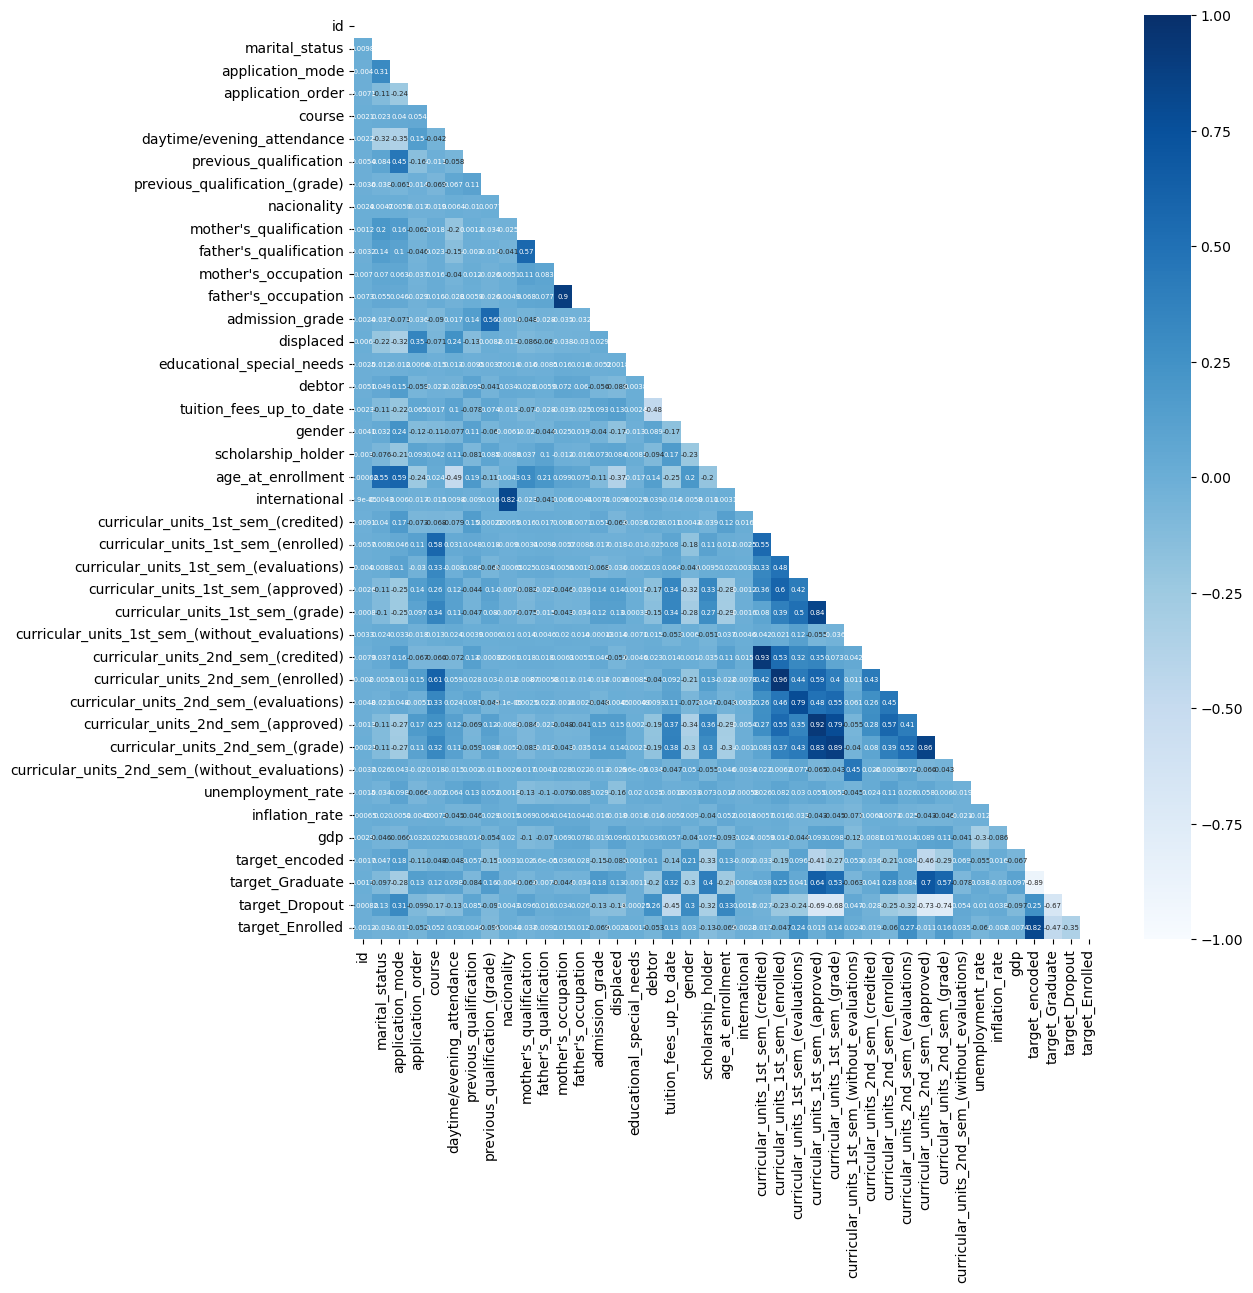

In [59]:
plt.figure(figsize=(12, 12))
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True, vmin = -1, vmax = 1, cmap='Blues', annot_kws={'fontsize':5});

A lot to digest here so I think I'll focus, right now at least, on targets and anything with a particularly strong (+- .8) correlation:

Oh, just realized I probably should have arranged them... hence instead we'll focus on the three targets individually:

Graduates: Main strong ones were their presenc in being approved or graded in either semester. Rest are meek at beast.

Dropouts: As we thought with tuition... and so too with approvd/grades - even stronger (negative) than graduates.

Enrolled: Meek, so it seems that enrolled will be the hardest to predict. Wonder if it might be worthwhile to make a model that focuses on graduates and dropouts (either at the same time or seperately, if that makes a difference) and then assume the rest are still enrolled. Regardless, expecting the most errors on this one.

Unsupervised:  As we thought: courses and credits enrolled are nicely correlated, age affecting applicaton mode AND rder, age being NEGATIVE with daytime ie the young students just focusing on their studies, parets' educations and occupations being strongly linked (especially occupation was inteesting). And, finally, the variuos fields within one semester and the next.

Didn't think, off hand, of pevious qualification and application mode. 

Although I don't think we said it, international obviously being strongly corrlated with nationality. 

Unless I think of something else, I think I'm done here with ceda. I suppose I'll later go back and make some fancy visuals later, but for now let us continue. Note that I'm unsure if I'll make them here or on a different notebook.

In [56]:
df.head()

,id,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,...,curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target,target_encoded
0,0,1,1,1,9238,1,1,126.0,1,1,...,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate,0
1,1,1,17,1,9238,1,1,125.0,1,19,...,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout,1
2,2,1,17,2,9254,1,1,137.0,1,3,...,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout,1
3,3,1,1,3,9500,1,1,131.0,1,19,...,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled,2
4,4,1,1,2,9500,1,1,132.0,1,19,...,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate,0
